Examen

In [16]:
from sympy import *
import sympy as sp
import sys

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['source', 'exp', 'gcd', 'reshape', 'eye', 'take', 'nan', 'invert', 'Line2D', 'Number', 'lcm', 'ones', 'sin', 'diag', 'fft', 'var', 're', 'tan', 'multinomial', 'array', 'cos', 'sign', 'ifft', 'zeros', 'sinc', 'product', 'transpose', 'roots', 'cosh', 'floor', 'seterr', 'deprecated', 'maximum', 'flatten', 'plotting', 'trace', 'Polygon', 'poly', 'power', 'minimum', 'conjugate', 'diff', 'pi', 'plot', 'partition', 'sinh', 'interactive', 'test', 'solve', 'mod', 'beta', 'prod', 'log', 'vectorize', 'Circle', 'cbrt', 'trunc', 'gamma', 'tanh', 'add', 'det', 'binomial', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


#### Instrucciones 

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$



In [227]:
#Declaro la variable y las funciones
x = Symbol('x')
y = Function('y')
z = Function('z')
w = Function('w')
g = Function('g')

In [228]:
#Asigno valor
y = sin(x)
z = cos(x)
w = 1 / (sin(2 * x) + cos(x))
g = y * z
g

sin(x)*cos(x)

In [229]:
Eq(Function('y')(x),y)

Eq(y(x), sin(x))

In [230]:
Eq(Function('z')(x),z)

Eq(z(x), cos(x))

In [231]:
Eq(Function('g')(x),g)

Eq(g(x), sin(x)*cos(x))

In [232]:
Eq(Function('w')(x),w)

Eq(w(x), 1/(sin(2*x) + cos(x)))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$


In [233]:
g_1 = diff(g)
g_1
Eq(Derivative(Function('g')(x)),g_1)

Eq(Derivative(g(x), x), -sin(x)**2 + cos(x)**2)

(c) Grafica $w(x)$ en el rango $[0,1]$

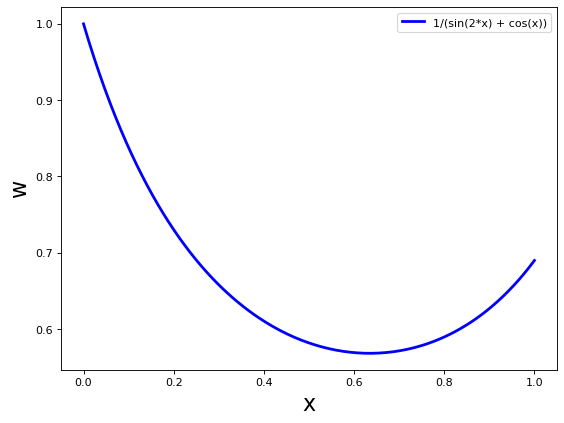

In [234]:
X = np.linspace(0,1, 256, endpoint=True) #Saco los valores que va a tomar X
W  = 1 / (np.cos(X) +  np.sin(2 * X)) #W saca sus valores de X y W es w(X) 
# Crea una figura de 8x6 pulgadas, con 80 puntos por pulgada (dots per inch = dpi)
plt.figure(figsize=(8, 6), dpi=80)
# Crea un subplot en una malla de 1x1.
plt.subplot(1, 1, 1)
plt.plot(X, W, color="blue", linewidth=2.5, linestyle="-", label=  w) #trayectoria de w(x) en el rango [0,1]
plt.xlabel('x',fontsize=20)
plt.ylabel('w',fontsize=20)
plt.legend(loc='best')

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.



In [235]:
Int_g = Function('G')
Int_g = integrate(g, x)
Int_g

sin(x)**2/2

In [236]:
Int_g.subs(x,1) - Int_g.subs(x,0)

sin(1)**2/2

In [242]:
integrate(g, (x, 0, 1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?


In [163]:
limit(y, x,0)

0

In [164]:
limit(z, x,0)

1

In [165]:
limit(g, x,0)

0

In [166]:
limit(w, x,0)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [169]:
t_y = sin(x).series(x,0) # y = sin x
Eq(Function('y')(x),t_y)

Eq(y(x), x - x**3/6 + x**5/120 + O(x**6))

In [170]:
t_z = cos(x).series(x,0) #z = cos x
Eq(Function('z')(x),t_z)

Eq(z(x), 1 - x**2/2 + x**4/24 + O(x**6))

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [216]:
#Declaro las variables ctes e iniciales.
a = .13
b = .2 
c = 6.5
x_0 = 0
y_0 = 0
z_0 = 0
#Determino la cantidad de pasos a dar, el tiempo de la simulación y el cambio en el tiempo. 
N = 1000000 # número de pasos
tau = 100.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso

El método de atracor de Rossler nos dice que la solución de estas ecuaciones es:

$$
x_{i+1} = x_i + \ (-y-z)\Delta t
$$

$$ 
y_{i+1} = y_i + \ (x + ay)  \Delta t
$$
$$ 
z_{i+1} = z_i + \ (b + z(x-c))  \Delta t
$$

In [217]:
#v = [x y z] estado 
#v' = [x' y' z'] --> [g0 g1 g2]
def atractor_Rossler(estado, sistema):
    g0 = -(estado[1] + estado[2])
    g1 = estado[0] + a * estado[1]
    g2 = b + estado[2] * (estado[0] - c)
    
    return np.array([g0, g1, g2])

In [218]:
#Tomado de la clase
def RK2(v, t, dt, derivadas):
    k0 = dt*derivadas(v, t)
    k1 = dt*derivadas(v + k0, t + dt)
    v_next = v + 0.5*(k0 + k1)
    
    return v_next

In [219]:
#Vamos a Crear v que va a gaurdar los datos de la trayectoria y poner los estados iniciales.
v = np.zeros([N,3])
time = np.linspace(0, tau, N)
v[0,0] = x_0
v[0,1] = y_0
v[0,2] = z_0

In [220]:
#Correr el programa para ir calculando los siguientes x,y,z
for j in range(N-1):
    v[j+1] = RK2(v[j], time[j], dt, atractor_Rossler)

In [221]:
print(v[N-1]) #valores expresados como [x,y,z]

[1.12525495 6.53188076 2.00767741]


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

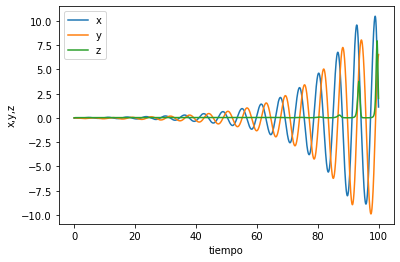

In [222]:
xdata = [v[j,0] for j in range(N)]
ydata = [v[j,1] for j in range(N)]
zdata = [v[j,2] for j in range(N)]

plt.plot(time, xdata, label="x")
plt.plot(time, ydata, label="y")
plt.plot(time, zdata, label="z")
plt.xlabel("tiempo")
plt.ylabel("x,y,z")
plt.legend(loc="best")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [223]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Z axis')

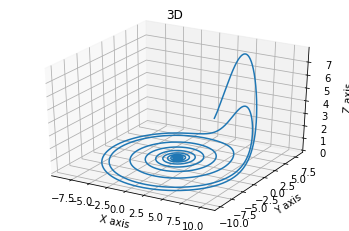

In [251]:
#3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.set_title("3D")
ax.plot(xdata,ydata,zdata) #plot (x,y,z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter(m[i,0],m[i,1],m[i,2],color='b') 

1.1252549519635002